In [1]:
import requests
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import random 
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import StreamingResponse, JSONResponse
import io

# ATTOM API's

**df1**

In [21]:
def fetch_attom_data(postalcode):
    api_key = "82465ff800ed8cde6fa0632ef54c6a8d"  
    
    headers = {
        'apikey': api_key
    }
    params = {
        'postalcode': postalcode,
        'propertytype': 'RESIDENTIAL',
        'pagesize': 100
    }

    response = requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/detail", headers=headers, params=params)
    response.raise_for_status()
    return response.json()

In [22]:
def attom_csv(data, filename):
    properties = data.get('property', [])

    rows = []
    for prop in properties:
        addr = prop.get('address', {})
        building = prop.get('building', {})
        size = building.get('size', {})
        listing = prop.get('sale', {}) or prop.get('list', {})

        location = f"{addr.get('line1', '')}, {addr.get('city', '')}, {addr.get('state', '')} {addr.get('postalcode', '')}".strip(", ")
        property_title = addr.get('line1', '') or "Unknown"

        row = {
            'property_title': property_title,
            'location': location,
            'number_of_rooms': building.get('rooms', ''),
            'price': listing.get('amount', ''),
            'size': size.get('universalsize', ''),
            'listing_type': listing.get('proptype', '') or "sale"
        }
        print(row)
        rows.append(row)

    df1 = pd.DataFrame(rows)
    df1.to_csv(filename, index=False)
    print(f"\nSaved {len(rows)} records to {filename}")
    return df1

In [23]:
data = fetch_attom_data("90210")
df1 = attom_csv(data, "attom_properties.csv")
print(df1)

{'property_title': '9836 YOAKUM DR', 'location': '9836 YOAKUM DR', 'number_of_rooms': {'bathsfull': 1, 'bathstotal': 1.0, 'beds': 2, 'roomsTotal': 5}, 'price': '', 'size': 674, 'listing_type': 'sale'}
{'property_title': '13345 MULHOLLAND DR', 'location': '13345 MULHOLLAND DR', 'number_of_rooms': {'bathsfull': 2, 'bathstotal': 2.0, 'beds': 2, 'roomsTotal': 6}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '2840 N BEVERLY DR', 'location': '2840 N BEVERLY DR', 'number_of_rooms': {'bathsfull': 8, 'bathstotal': 8.0, 'beds': 4}, 'price': '', 'size': 6997, 'listing_type': 'sale'}
{'property_title': '9360 BEVERLY CREST DR', 'location': '9360 BEVERLY CREST DR', 'number_of_rooms': {'bathsfull': 4, 'bathstotal': 4.0, 'beds': 5}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '9801 EASTON DR', 'location': '9801 EASTON DR', 'number_of_rooms': {'bathsfull': 2, 'bathstotal': 2.0, 'beds': 3}, 'price': '', 'size': 1147, 'listing_type': 'sale'}
{'property_title

In [24]:
df1

,property_title,location,number_of_rooms,price,size,listing_type
0,9836 YOAKUM DR,9836 YOAKUM DR,"{'bathsfull': 1, 'bathstotal': 1.0, 'beds': 2,...",,674,sale
1,13345 MULHOLLAND DR,13345 MULHOLLAND DR,"{'bathsfull': 2, 'bathstotal': 2.0, 'beds': 2,...",,,sale
2,2840 N BEVERLY DR,2840 N BEVERLY DR,"{'bathsfull': 8, 'bathstotal': 8.0, 'beds': 4}",,6997,sale
3,9360 BEVERLY CREST DR,9360 BEVERLY CREST DR,"{'bathsfull': 4, 'bathstotal': 4.0, 'beds': 5}",,,sale
4,9801 EASTON DR,9801 EASTON DR,"{'bathsfull': 2, 'bathstotal': 2.0, 'beds': 3}",,1147,sale
...,...,...,...,...,...,...
95,9412 BEVERLY CREST DR,9412 BEVERLY CREST DR,"{'beds': 2, 'roomsTotal': 8}",,,sale
96,1422 LINDACREST DR,1422 LINDACREST DR,{},,,sale
97,1462 CLARIDGE DR,1462 CLARIDGE DR,"{'bathsfull': 4, 'bathstotal': 4.0, 'beds': 4}",,3106,sale
98,1426 HARRIDGE DR,1426 HARRIDGE DR,{},,1044,sale


**df2**

In [25]:
def fetch_attom_data(postalcode):
    api_key = "82465ff800ed8cde6fa0632ef54c6a8d"  
    
    headers = {
        'apikey': api_key
    }
    params = {
        'postalcode': postalcode,
        'propertytype': 'RESIDENTIAL',
        'pagesize': 100
    }

    response = requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/basicprofile", headers=headers, params=params)
    response.raise_for_status()
    return response.json()

In [26]:
def attom_csv(data, filename):
    properties = data.get('property', [])

    rows = []
    for prop in properties:
        addr = prop.get('address', {})
        building = prop.get('building', {})
        size = building.get('size', {})
        listing = prop.get('sale', {}) or prop.get('list', {})

        location = f"{addr.get('line1', '')}, {addr.get('city', '')}, {addr.get('state', '')} {addr.get('postalcode', '')}".strip(", ")
        property_title = addr.get('line1', '') or "Unknown"

        row = {
            'property_title': property_title,
            'location': location,
            'number_of_rooms': building.get('rooms', ''),
            'price': listing.get('amount', ''),
            'size': size.get('universalsize', ''),
            'listing_type': listing.get('proptype', '') or "sale"
        }
        print(row)
        rows.append(row)

    df2 = pd.DataFrame(rows)
    df2.to_csv(filename, index=False)
    print(f"\nSaved {len(rows)} records to {filename}")
    return df2

In [27]:
data = fetch_attom_data("90210")
df2 = attom_csv(data, "attom_basicprofile.csv")
print(df2)

{'property_title': '9836 YOAKUM DR', 'location': '9836 YOAKUM DR', 'number_of_rooms': {'bathsFull': 1, 'bathsTotal': 1.0, 'beds': 2, 'roomsTotal': 5}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '13345 MULHOLLAND DR', 'location': '13345 MULHOLLAND DR', 'number_of_rooms': {'bathsFull': 2, 'bathsTotal': 2.0, 'beds': 2, 'roomsTotal': 6}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '2840 N BEVERLY DR', 'location': '2840 N BEVERLY DR', 'number_of_rooms': {'bathsFull': 8, 'bathsTotal': 8.0, 'beds': 4}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '9360 BEVERLY CREST DR', 'location': '9360 BEVERLY CREST DR', 'number_of_rooms': {'bathsFull': 4, 'bathsTotal': 4.0, 'beds': 5}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '9801 EASTON DR', 'location': '9801 EASTON DR', 'number_of_rooms': {'bathsFull': 2, 'bathsTotal': 2.0, 'beds': 3}, 'price': '', 'size': '', 'listing_type': 'sale'}
{'property_title': '1

In [28]:
df2

,property_title,location,number_of_rooms,price,size,listing_type
0,9836 YOAKUM DR,9836 YOAKUM DR,"{'bathsFull': 1, 'bathsTotal': 1.0, 'beds': 2,...",,,sale
1,13345 MULHOLLAND DR,13345 MULHOLLAND DR,"{'bathsFull': 2, 'bathsTotal': 2.0, 'beds': 2,...",,,sale
2,2840 N BEVERLY DR,2840 N BEVERLY DR,"{'bathsFull': 8, 'bathsTotal': 8.0, 'beds': 4}",,,sale
3,9360 BEVERLY CREST DR,9360 BEVERLY CREST DR,"{'bathsFull': 4, 'bathsTotal': 4.0, 'beds': 5}",,,sale
4,9801 EASTON DR,9801 EASTON DR,"{'bathsFull': 2, 'bathsTotal': 2.0, 'beds': 3}",,,sale
...,...,...,...,...,...,...
95,9412 BEVERLY CREST DR,9412 BEVERLY CREST DR,"{'beds': 2, 'roomsTotal': 8}",,,sale
96,1422 LINDACREST DR,1422 LINDACREST DR,{},,,sale
97,1462 CLARIDGE DR,1462 CLARIDGE DR,"{'bathsFull': 4, 'bathsTotal': 4.0, 'beds': 4}",,,sale
98,1426 HARRIDGE DR,1426 HARRIDGE DR,{},,,sale


**df3**

In [32]:
def fetch_attom_data(postalcode):
    api_key = "82465ff800ed8cde6fa0632ef54c6a8d"  
    
    headers = {
        'apikey': api_key
    }
    params = {
        'postalcode': postalcode,
        'propertytype': 'RESIDENTIAL',
        'pagesize': 50
    }

    response = requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/allevents/snapshot", headers=headers, params=params)
    response.raise_for_status()
    return response.json()

In [33]:
def attom_csv(data, filename):
    properties = data.get('property', [])

    rows = []
    for prop in properties:
        addr = prop.get('address', {})
        building = prop.get('building', {})
        size = building.get('size', {})
        listing = prop.get('sale', {}) or prop.get('list', {})

        location = f"{addr.get('line1', '')}, {addr.get('city', '')}, {addr.get('state', '')} {addr.get('postalcode', '')}".strip(", ")
        property_title = addr.get('line1', '') or "Unknown"

        row = {
            'property_title': property_title,
            'location': location,
            'number_of_rooms': building.get('rooms', ''),
            'price': listing.get('amount', ''),
            'size': size.get('universalsize', ''),
            'listing_type': listing.get('proptype', '') or "sale"
        }
        print(row)
        rows.append(row)

    df3 = pd.DataFrame(rows)
    df3.to_csv(filename, index=False)
    print(f"\nSaved {len(rows)} records to {filename}")
    return df3

In [34]:
data = fetch_attom_data("90210")
df3 = attom_csv(data, "attom_eventsnapshot.csv")
print(df3)

{'property_title': '9836 YOAKUM DR', 'location': '9836 YOAKUM DR', 'number_of_rooms': {'bathstotal': 1.0, 'beds': 2}, 'price': {'saleamt': 825000, 'salecode': 'SALE PRICE (FULL) Full sales price as per documents', 'salerecdate': '2016-07-28', 'saledisclosuretype': 0, 'saledoctype': 'DEED', 'saledocnum': '0000886610', 'saletranstype': 'Resale'}, 'size': 674, 'listing_type': 'sale'}
{'property_title': '13345 MULHOLLAND DR', 'location': '13345 MULHOLLAND DR', 'number_of_rooms': {'bathstotal': 2.0, 'beds': 2}, 'price': {'saleamt': 355000, 'salecode': 'SALE PRICE (FULL) Full sales price as per documents', 'salerecdate': '2011-12-08', 'saledisclosuretype': 0, 'saledoctype': 'DEED', 'saledocnum': '0001661989', 'saletranstype': 'Resale'}, 'size': '', 'listing_type': 'sale'}
{'property_title': '2840 N BEVERLY DR', 'location': '2840 N BEVERLY DR', 'number_of_rooms': {'bathstotal': 8.0, 'beds': 4}, 'price': {'saleamt': 4050000, 'salerecdate': '2005-10-11', 'saledisclosuretype': 0, 'saledoctype': 

In [35]:
df3

,property_title,location,number_of_rooms,price,size,listing_type
0,9836 YOAKUM DR,9836 YOAKUM DR,"{'bathstotal': 1.0, 'beds': 2}","{'saleamt': 825000, 'salecode': 'SALE PRICE (F...",674,sale
1,13345 MULHOLLAND DR,13345 MULHOLLAND DR,"{'bathstotal': 2.0, 'beds': 2}","{'saleamt': 355000, 'salecode': 'SALE PRICE (F...",,sale
2,2840 N BEVERLY DR,2840 N BEVERLY DR,"{'bathstotal': 8.0, 'beds': 4}","{'saleamt': 4050000, 'salerecdate': '2005-10-1...",6997,sale
3,9360 BEVERLY CREST DR,9360 BEVERLY CREST DR,"{'bathstotal': 4.0, 'beds': 5}","{'saleamt': 5750000, 'salerecdate': '2024-12-0...",,sale
4,9801 EASTON DR,9801 EASTON DR,"{'bathstotal': 2.0, 'beds': 3}","{'saleamt': 1465000, 'salerecdate': '2021-03-1...",1147,sale
5,1438 DAVIES DR,1438 DAVIES DR,"{'bathstotal': 2.0, 'beds': 2}","{'saleamt': 2150000, 'salerecdate': '2022-03-1...",,sale
6,9333 HAZEN DR,9333 HAZEN DR,"{'bathstotal': 1.0, 'beds': 1}",{'saledisclosuretype': 0},1247,sale
7,9331 HAZEN DR,9331 HAZEN DR,"{'bathstotal': 1.0, 'beds': 5}","{'salerecdate': '2014-10-22', 'saledisclosuret...",1000,sale
8,9810 PORTOLA DR,9810 PORTOLA DR,"{'bathstotal': 1.0, 'beds': 2}",{'saledisclosuretype': 0},935,sale
9,9805 PORTOLA DR,9805 PORTOLA DR,{},"{'saleamt': 89000, 'salecode': 'SALE PRICE (FU...",,sale


# Data Pre-Processing

# df1

In [36]:
df1 = pd.read_csv("attom_properties.csv")

In [37]:
df1

,property_title,location,number_of_rooms,price,size,listing_type
0,9836 YOAKUM DR,9836 YOAKUM DR,"{'bathsfull': 1, 'bathstotal': 1.0, 'beds': 2,...",NaN,674.0,sale
1,13345 MULHOLLAND DR,13345 MULHOLLAND DR,"{'bathsfull': 2, 'bathstotal': 2.0, 'beds': 2,...",NaN,NaN,sale
2,2840 N BEVERLY DR,2840 N BEVERLY DR,"{'bathsfull': 8, 'bathstotal': 8.0, 'beds': 4}",NaN,6997.0,sale
3,9360 BEVERLY CREST DR,9360 BEVERLY CREST DR,"{'bathsfull': 4, 'bathstotal': 4.0, 'beds': 5}",NaN,NaN,sale
4,9801 EASTON DR,9801 EASTON DR,"{'bathsfull': 2, 'bathstotal': 2.0, 'beds': 3}",NaN,1147.0,sale
...,...,...,...,...,...,...
95,9412 BEVERLY CREST DR,9412 BEVERLY CREST DR,"{'beds': 2, 'roomsTotal': 8}",NaN,NaN,sale
96,1422 LINDACREST DR,1422 LINDACREST DR,{},NaN,NaN,sale
97,1462 CLARIDGE DR,1462 CLARIDGE DR,"{'bathsfull': 4, 'bathstotal': 4.0, 'beds': 4}",NaN,3106.0,sale
98,1426 HARRIDGE DR,1426 HARRIDGE DR,{},NaN,1044.0,sale


In [38]:
# Drop existing listing_type as it shows the same input (sale)
if 'listing_type' in df1.columns:
    df1.drop(columns=['listing_type'], inplace=True)

In [39]:
#Create new listing_type column --> rent or sale
df1['listing_type'] = random.choices(['rent', 'sale'], weights=[0.5, 0.5], k=len(df1))

In [40]:
# Drop existing listing_type as it shows the same input (sale)
if 'number_of_rooms' in df1.columns:
    df1.drop(columns=['number_of_rooms'], inplace=True)

In [41]:
#drop column price
df1.drop(columns=['price'], inplace=True)

In [42]:
#drop size column
df1.drop(columns=['size'], inplace=True)

In [43]:
df1.drop(columns=['property_title'], inplace=True)

In [47]:
#replace the property_title data
titles = [
    "The Townhouse",
    "Luxury Condo Downtown",
    "Cozy Studio Apartment",
    "Modern Family Home",
    "Elegant Villa with Garden",
    "Spacious Urban Loft",
    "Penthouse with City Views",
    "Beachfront Apartment",
    "Split-Level House with Modern Finishes",
    "Minimalist Studio Near Coffee Shops",
    "Luxury Townhome with Garage",
    "Family Home in School District",
    "Corner Lot Property with Fenced Yard",
    "Mountain Cabin with Hot Tub",
    "Sunny Bungalow",
    "Urban Chic Condo in Financial District",
    "Lakeview Cabin",
    "Pet-Friendly Flat in the City",
    "Downtown Studio Apartment",
    "Renovated Duplex with Balcony",
    "High-Rise Apartment with Gym Access",
    "Coastal Home with Wraparound Porch",
    "Suburban Home with Finished Basement",
    "Compact Condo with Built-In Storage",
    "The Family House",
    "Converted Warehouse Loft",
    "Mountain Chalet",
    "Moon House",
    "Townhome in Gated Complex",
    "Classic Colonial in Quiet Neighborhood",
    "Studio Loft with Industrial Vibe",
    "The Affordable Apartment",
    "Countryside Farmhouse Retreat",
    "Luxury Lakefront Villa",
    "Home with Formal Dining Room",
    "Studio in Walkable Historic District",
    "Energy-Efficient Home with Smart Features",
    "Bohemian Loft in Cultural Center",
    "Elegant Estate on Private Drive",
    "Modern Duplex with Shared Garden"
    "B1 Apartment",
    "Open-Concept Flat",
    "Compact Downtown Micro-Studio",
    "Spacious Multi-Family Unit",
    "Luxury Apartment in Midtown",
    "Sunny Top-Floor Apartment",
    "Green-Energy Eco-Home",
    "The Glam Flat",
    "Gardens Home",
    "Great Star Apartment",
    "The Modren Building",
    "Charming Craftsman Bungalow",
    "Urban Penthouse Suite",
    "Cozy Lakeside Cottage",
    "Modern Eco-Friendly Home",
    "Vintage Brownstone Apartment",
    "Seaside Villa with Pool",
    "Downtown Loft with Skyline Views",
    "Rustic Mountain Retreat",
    "Luxury High-Rise Condo",
    "Family-Friendly Suburban Home",
    "Historic Townhouse Renovation",
    "Sunny Mediterranean Villa",
    "Spacious Ranch with Barn",
    "Contemporary Studio Apartment",
    "Elegant Colonial Revival",
    "Waterfront Condo with Marina Access",
    "Quiet Cul-de-Sac Family Home",
    "Loft Apartment with Exposed Brick",
    "Modern Farmhouse with Porch",
    "Downtown Executive Condo",
    "Cozy Chalet in Ski Resort",
    "Suburban Townhome with Garage",
    "Luxury Duplex with Private Garden",
    "Open Floorplan Loft",
    "Secluded Cabin in the Woods",
    "Bright and Airy Penthouse",
    "Modern Minimalist Flat",
    "Historic Victorian Home",
    "Beachside Bungalow",
    "City-Center Studio Apartment",
    "Spacious Duplex with Balcony",
    "Luxury Estate with Tennis Court",
    "Cozy Condo Near Park",
    "Modern Apartment with Gym",
    "Lakefront Family Cottage",
    "Renovated Loft with City Views",
    "Chic Studio Near University",
    "Contemporary Villa with Pool",
    "Suburban Home with Large Yard",
    "Eco-Friendly Tiny House",
    "Luxury Penthouse with Rooftop Deck",
    "Spacious Family Townhouse",
    "Downtown Loft with Modern Amenities",
    "Quaint Cottage with Garden",
    "Open Concept Urban Flat",
    "Cozy Cabin Retreat",
    "Modern Condo with Balcony",
    "Spacious Single-Family Home",
    "Elegant Apartment in Historic Building",
    "Modern Loft in Trendy Neighborhood"   
]
len(titles)

100

In [48]:
#Create property_title column with the titles
df1['property_title'] = titles[:len(df1)]

In [49]:
df1

,location,listing_type,property_title
0,9836 YOAKUM DR,rent,The Townhouse
1,13345 MULHOLLAND DR,rent,Luxury Condo Downtown
2,2840 N BEVERLY DR,rent,Cozy Studio Apartment
3,9360 BEVERLY CREST DR,rent,Modern Family Home
4,9801 EASTON DR,rent,Elegant Villa with Garden
...,...,...,...
95,9412 BEVERLY CREST DR,sale,Cozy Cabin Retreat
96,1422 LINDACREST DR,sale,Modern Condo with Balcony
97,1462 CLARIDGE DR,sale,Spacious Single-Family Home
98,1426 HARRIDGE DR,sale,Elegant Apartment in Historic Building


# df2

In [50]:
df2

,property_title,location,number_of_rooms,price,size,listing_type
0,9836 YOAKUM DR,9836 YOAKUM DR,"{'bathsFull': 1, 'bathsTotal': 1.0, 'beds': 2,...",,,sale
1,13345 MULHOLLAND DR,13345 MULHOLLAND DR,"{'bathsFull': 2, 'bathsTotal': 2.0, 'beds': 2,...",,,sale
2,2840 N BEVERLY DR,2840 N BEVERLY DR,"{'bathsFull': 8, 'bathsTotal': 8.0, 'beds': 4}",,,sale
3,9360 BEVERLY CREST DR,9360 BEVERLY CREST DR,"{'bathsFull': 4, 'bathsTotal': 4.0, 'beds': 5}",,,sale
4,9801 EASTON DR,9801 EASTON DR,"{'bathsFull': 2, 'bathsTotal': 2.0, 'beds': 3}",,,sale
...,...,...,...,...,...,...
95,9412 BEVERLY CREST DR,9412 BEVERLY CREST DR,"{'beds': 2, 'roomsTotal': 8}",,,sale
96,1422 LINDACREST DR,1422 LINDACREST DR,{},,,sale
97,1462 CLARIDGE DR,1462 CLARIDGE DR,"{'bathsFull': 4, 'bathsTotal': 4.0, 'beds': 4}",,,sale
98,1426 HARRIDGE DR,1426 HARRIDGE DR,{},,,sale


In [51]:
print(df2['number_of_rooms'].iloc[0])
print(type(df2['number_of_rooms'].iloc[0]))

{'bathsFull': 1, 'bathsTotal': 1.0, 'beds': 2, 'roomsTotal': 5}
<class 'dict'>


In [52]:
#extract roomsTotla from the dict in number_of_rooms
df2['number_of_rooms'] = df2['number_of_rooms'].apply(lambda x: x.get('roomsTotal') if isinstance(x, dict) else None)
print(df2[['number_of_rooms']].head())

#fill null values with means
df2['number_of_rooms'].fillna(df2['number_of_rooms'].mean(), inplace=True)

   number_of_rooms
0              5.0
1              6.0
2              NaN
3              NaN
4              NaN


C:\Users\admin\AppData\Local\Temp\ipykernel_20832\2511123970.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['number_of_rooms'].fillna(df2['number_of_rooms'].mean(), inplace=True)


In [53]:
#Convert to integer
df2['number_of_rooms'] = df2['number_of_rooms'].round().astype(int)
print(df2[['number_of_rooms']].head())

   number_of_rooms
0                5
1                6
2               13
3               13
4               13


In [54]:
#drop property_title, location, price, size, listing_type columns
df2.drop(columns=['property_title'], inplace=True)
df2.drop(columns=['location'], inplace=True)
df2.drop(columns=['price'], inplace=True)
df2.drop(columns=['size'], inplace=True)
df2.drop(columns=['listing_type'], inplace=True)

In [55]:
df2

,number_of_rooms
0,5
1,6
2,13
3,13
4,13
...,...
95,8
96,13
97,13
98,13


# df3

In [56]:
df3

,property_title,location,number_of_rooms,price,size,listing_type
0,9836 YOAKUM DR,9836 YOAKUM DR,"{'bathstotal': 1.0, 'beds': 2}","{'saleamt': 825000, 'salecode': 'SALE PRICE (F...",674,sale
1,13345 MULHOLLAND DR,13345 MULHOLLAND DR,"{'bathstotal': 2.0, 'beds': 2}","{'saleamt': 355000, 'salecode': 'SALE PRICE (F...",,sale
2,2840 N BEVERLY DR,2840 N BEVERLY DR,"{'bathstotal': 8.0, 'beds': 4}","{'saleamt': 4050000, 'salerecdate': '2005-10-1...",6997,sale
3,9360 BEVERLY CREST DR,9360 BEVERLY CREST DR,"{'bathstotal': 4.0, 'beds': 5}","{'saleamt': 5750000, 'salerecdate': '2024-12-0...",,sale
4,9801 EASTON DR,9801 EASTON DR,"{'bathstotal': 2.0, 'beds': 3}","{'saleamt': 1465000, 'salerecdate': '2021-03-1...",1147,sale
5,1438 DAVIES DR,1438 DAVIES DR,"{'bathstotal': 2.0, 'beds': 2}","{'saleamt': 2150000, 'salerecdate': '2022-03-1...",,sale
6,9333 HAZEN DR,9333 HAZEN DR,"{'bathstotal': 1.0, 'beds': 1}",{'saledisclosuretype': 0},1247,sale
7,9331 HAZEN DR,9331 HAZEN DR,"{'bathstotal': 1.0, 'beds': 5}","{'salerecdate': '2014-10-22', 'saledisclosuret...",1000,sale
8,9810 PORTOLA DR,9810 PORTOLA DR,"{'bathstotal': 1.0, 'beds': 2}",{'saledisclosuretype': 0},935,sale
9,9805 PORTOLA DR,9805 PORTOLA DR,{},"{'saleamt': 89000, 'salecode': 'SALE PRICE (FU...",,sale


In [57]:
#drop property_title, location, number_of_rooms ,listing_type columns
df3.drop(columns=['property_title'], inplace=True)
df3.drop(columns=['location'], inplace=True)
df3.drop(columns=['number_of_rooms'], inplace=True)
df3.drop(columns=['listing_type'], inplace=True)

In [58]:
print(type(df3['price'].iloc[0]))

<class 'dict'>


In [59]:
#extract saleamt from the dict in price
df3['price'] = df3['price'].apply(lambda x: x.get('saleamt') if isinstance(x, dict) else None)

In [60]:
#fill null values with means
df3['price'].fillna(df3['price'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_20832\2667439701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['price'].fillna(df3['price'].mean(), inplace=True)


In [61]:
print(df3[['price']].head())

       price
0   825000.0
1   355000.0
2  4050000.0
3  5750000.0
4  1465000.0


In [62]:
#Convert price to integer
df3['price'] = df3['price'].round().astype(int)

In [64]:
#convert size (object) to (integer)
#remove commas or unwanted characters
df3['size'] = pd.to_numeric(df3['size'], errors='coerce')

#fill NaNs cells
df3['size'].fillna(df3['size'].mean(), inplace=True)

#convert to integer
df3['size'] = df3['size'].round().astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_20832\3658870293.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['size'].fillna(df3['size'].mean(), inplace=True)


In [65]:
df3

,price,size
0,825000,674
1,355000,6779
2,4050000,6997
3,5750000,6779
4,1465000,1147
5,2150000,6779
6,6962825,1247
7,6962825,1000
8,6962825,935
9,89000,6779


**Data Merge**

In [92]:
#Merge DataFrames
merged_df = pd.concat([df1, df2, df3], axis=1)

#reorder the columns 
merged_df = merged_df[['property_title', 'listing_type', 'location', 'number_of_rooms', 'price', 'size']]

In [93]:
#rename the size and price columns 
merged_df.rename(columns={'price': 'price (USD)','size': 'size (sqft)'}, inplace=True)

In [94]:
merged_df

,property_title,listing_type,location,number_of_rooms,price (USD),size (sqft)
0,The Townhouse,rent,9836 YOAKUM DR,5,825000.0,674.0
1,Luxury Condo Downtown,rent,13345 MULHOLLAND DR,6,355000.0,6779.0
2,Cozy Studio Apartment,rent,2840 N BEVERLY DR,13,4050000.0,6997.0
3,Modern Family Home,rent,9360 BEVERLY CREST DR,13,5750000.0,6779.0
4,Elegant Villa with Garden,rent,9801 EASTON DR,13,1465000.0,1147.0
...,...,...,...,...,...,...
95,Cozy Cabin Retreat,sale,9412 BEVERLY CREST DR,8,NaN,NaN
96,Modern Condo with Balcony,sale,1422 LINDACREST DR,13,NaN,NaN
97,Spacious Single-Family Home,sale,1462 CLARIDGE DR,13,NaN,NaN
98,Elegant Apartment in Historic Building,sale,1426 HARRIDGE DR,13,NaN,NaN


In [95]:
merged_df['size (sqft)'].fillna(merged_df['size (sqft)'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_20832\1045451633.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['size (sqft)'].fillna(merged_df['size (sqft)'].mean(), inplace=True)


In [96]:
merged_df['price (USD)'].fillna(merged_df['price (USD)'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_20832\3280922048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['price (USD)'].fillna(merged_df['price (USD)'].mean(), inplace=True)


In [97]:
#Convert price and size column to integer
merged_df['price (USD)'] = merged_df['price (USD)'].round().astype(int)
merged_df['size (sqft)'] = merged_df['size (sqft)'].round().astype(int)

In [98]:
merged_df

,property_title,listing_type,location,number_of_rooms,price (USD),size (sqft)
0,The Townhouse,rent,9836 YOAKUM DR,5,825000,674
1,Luxury Condo Downtown,rent,13345 MULHOLLAND DR,6,355000,6779
2,Cozy Studio Apartment,rent,2840 N BEVERLY DR,13,4050000,6997
3,Modern Family Home,rent,9360 BEVERLY CREST DR,13,5750000,6779
4,Elegant Villa with Garden,rent,9801 EASTON DR,13,1465000,1147
...,...,...,...,...,...,...
95,Cozy Cabin Retreat,sale,9412 BEVERLY CREST DR,8,6962825,6779
96,Modern Condo with Balcony,sale,1422 LINDACREST DR,13,6962825,6779
97,Spacious Single-Family Home,sale,1462 CLARIDGE DR,13,6962825,6779
98,Elegant Apartment in Historic Building,sale,1426 HARRIDGE DR,13,6962825,6779


In [89]:
merged_df.to_csv('C:/Users/admin/Desktop/merged_df.csv', index=False)

# Predictive Modeling 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
df_encoded= merged_df.copy()
cols_label= ['property_title', 'listing_type', 'location']

#apply Label Encoding
for col in cols_label:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col]).astype(str)

In [100]:
#feature columns
X = df_encoded.drop('price (USD)', axis=1)
y = df_encoded['price (USD)']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

Baseline for linear relationships and easy interpretability

In [101]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

# Evaluate the model (metrics explained)
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print("--- Linear Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Absolute Error (MAE): 1473026.39
Mean Squared Error (MSE): 7633991938014.95
Root Mean Squared Error (RMSE): 2762967.96
R-squared (R2): 0.40


**Decision Tree**

Captures the non-linearities and easy to visualize

In [103]:
# Create and train DCT Regression model
dct = DecisionTreeRegressor(random_state=42)
dct.fit(X_train, y_train)
y_pred_dct = dct.predict(X_test)

# Evaluate the model (metrics explained)
mae = mean_absolute_error(y_test, y_pred_dct)
mse = mean_squared_error(y_test, y_pred_dct)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dct)

print("--- DCT Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- DCT Regression Results ---
Mean Absolute Error (MAE): 2925571.25
Mean Squared Error (MSE): 16530788446843.75
Root Mean Squared Error (RMSE): 4065807.23
R-squared (R2): -0.31


**Random Forest**

Reduces overfitting by averaging multiple trees

In [104]:
# Create and train RF Regression model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Evaluate the model (metrics explained)
mae = mean_absolute_error(y_test, y_pred_rfr)
mse = mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rfr)

print("--- Random Forest Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Random Forest Regression Results ---
Mean Absolute Error (MAE): 2034284.16
Mean Squared Error (MSE): 8385858200277.53
Root Mean Squared Error (RMSE): 2895834.63
R-squared (R2): 0.34


**Gradiant Boosting**

Often it gives the best results on tabular data by sequentially correcting errors

In [105]:
# Create and train the GB Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print("--- Gradient Boosting Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Gradient Boosting Regression Results ---
Mean Absolute Error (MAE): 2453081.59
Mean Squared Error (MSE): 10245745795808.95
Root Mean Squared Error (RMSE): 3200897.65
R-squared (R2): 0.19


**Evaluation Metrics**

MAE(Mean Absolute Error): Measures average absolute errors.

RMSE(Root Mean Squared Error): Penalizes large errors more and useful when large outliers matter.

R²(R-squared): Measures proportion of variance explained, the higher is better and 1 is perfect.

# Models Plotting

In [106]:
import matplotlib.pyplot as plt

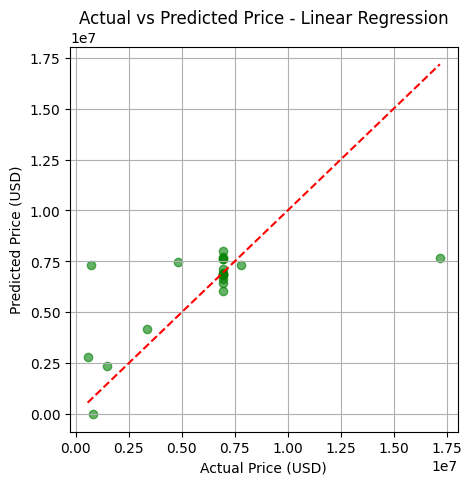

In [114]:
#Linear Regression
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Price - Linear Regression")
plt.grid(True)
plt.show()

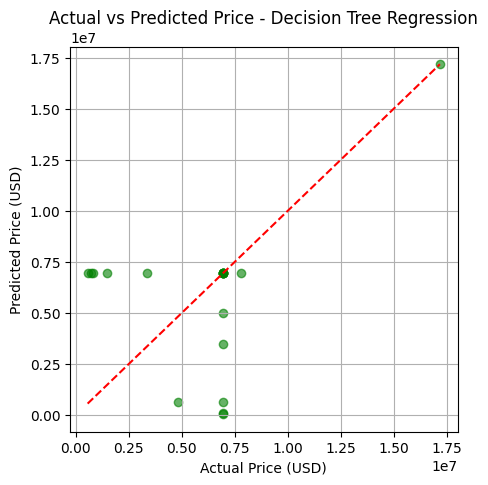

In [110]:
#Decision Tree
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_dct, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Price - Decision Tree Regression")
plt.grid(True)
plt.show()

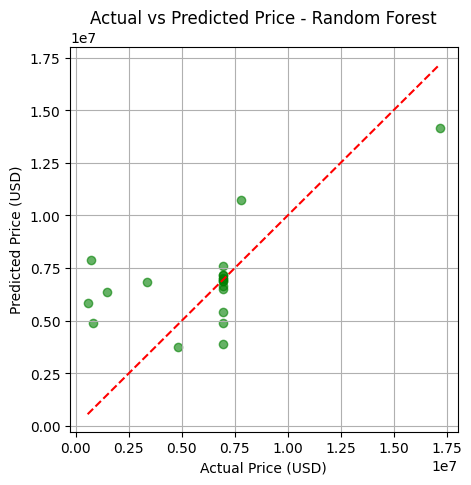

In [111]:
#Random Forest
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_rfr, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Price - Random Forest")
plt.grid(True)
plt.show()

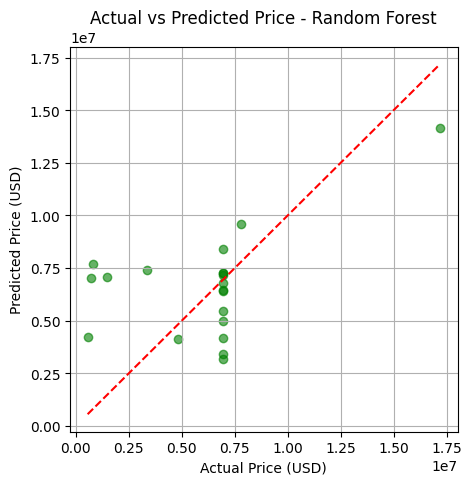

In [115]:
#Gradiant Boosting
#Random Forest
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Price - Random Forest")
plt.grid(True)
plt.show()